## Care Price Prediction using ANN

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car_df = pd.read_csv('Car_Purchasing_Data.csv', encoding='ISO-8859-1')

In [3]:
car_df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
car_df.columns

Index(['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

In [5]:
car_df.shape

(500, 9)

In [6]:
#statistical analysis of Dataset
car_df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


### Value_Counts()

In [7]:
for col in list(car_df):
    print(col, car_df[col].nunique())

Customer Name 498
Customer e-mail 500
Country 211
Gender 2
Age 500
Annual Salary 500
Credit Card Debt 500
Net Worth 500
Car Purchase Amount 500


### missing values

In [8]:
car_df.isnull().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

<AxesSubplot:>

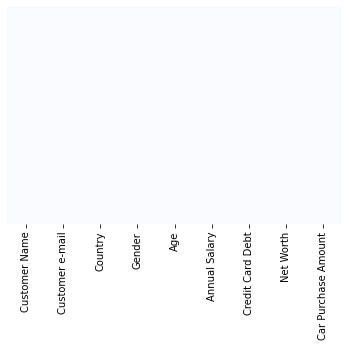

In [9]:
sns.heatmap(car_df.isnull(), cmap='Blues', cbar=False, yticklabels=False)

### Exploratory Data Analysis(EDA)

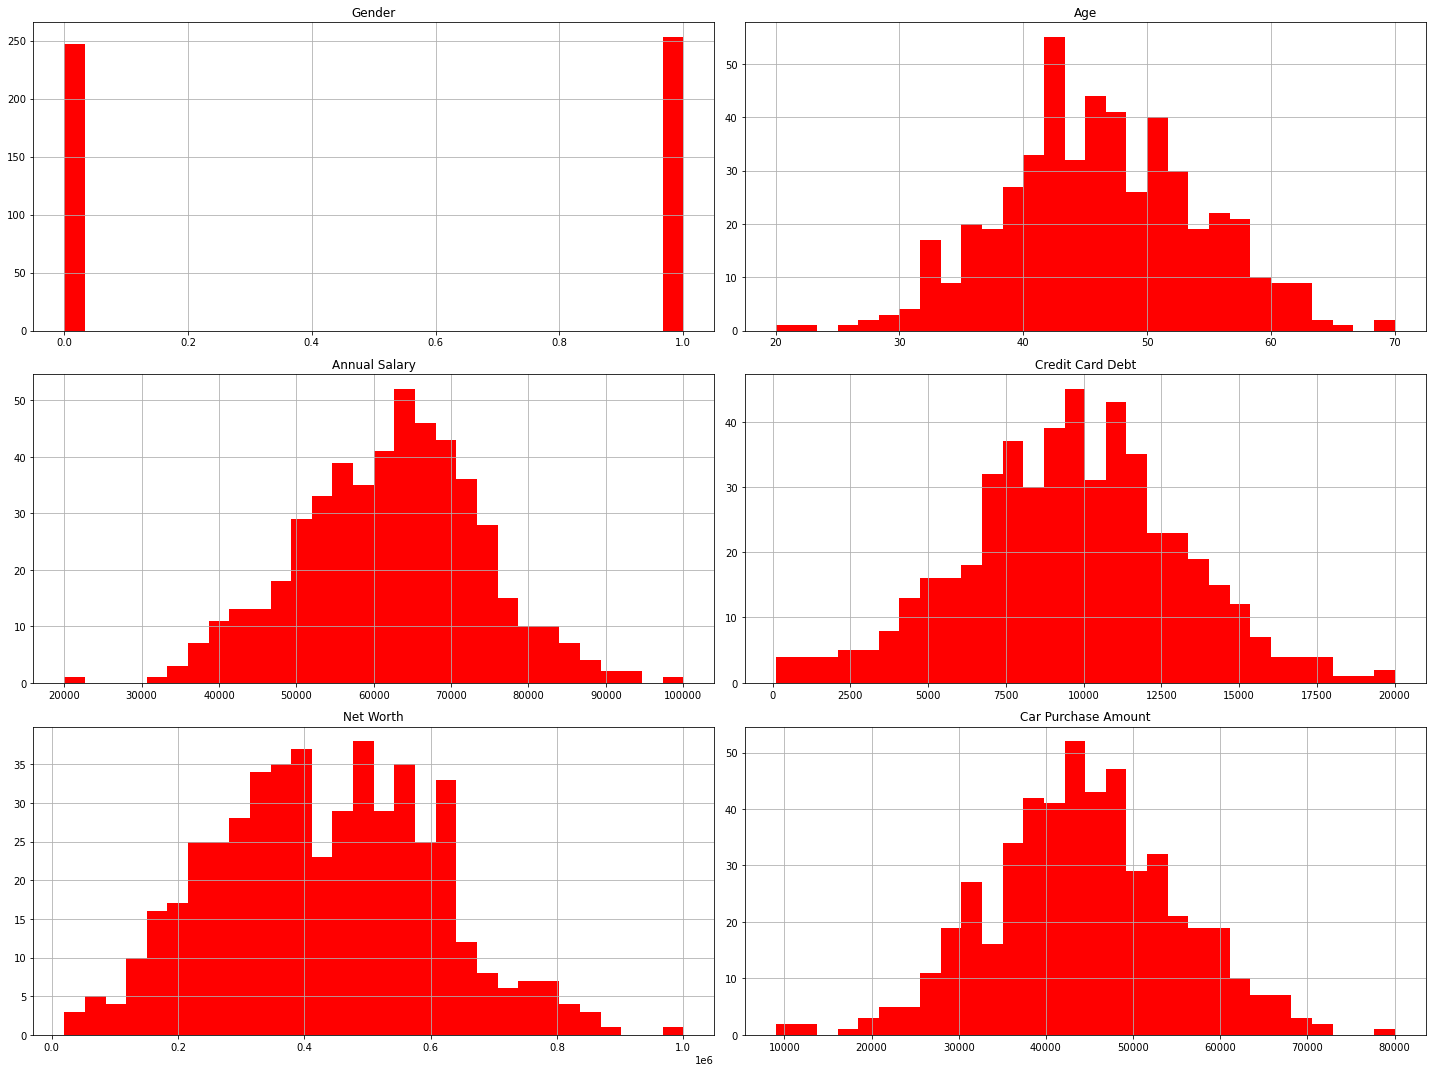

In [10]:
car_df.hist(bins=30, figsize=(20,15), color='r')
plt.tight_layout()

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


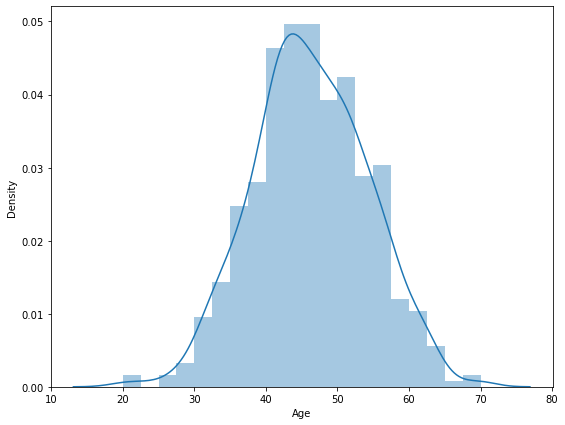

In [11]:
plt.figure(figsize=(9,7))
sns.distplot(car_df['Age'],bins=20)
plt.show()

### Dropping Unwanted Columns

In [12]:
x= car_df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis=1)
x

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


In [13]:
y = car_df['Car Purchase Amount']
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

### Feature Importance to find which columns are more important in predicting the target column

In [14]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [15]:
model.feature_importances_

array([0.00750575, 0.3838881 , 0.37134216, 0.01044275, 0.22682125])

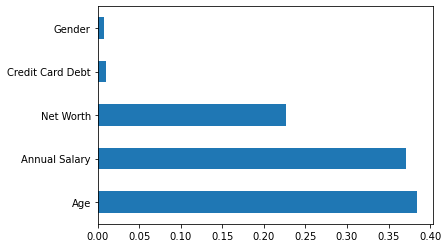

In [16]:
feature_imp = pd.Series(model.feature_importances_, index=x.columns)
feature_imp.nlargest(10).plot(kind='barh')
plt.show()

In [17]:
print(feature_imp)

Gender              0.007506
Age                 0.383888
Annual Salary       0.371342
Credit Card Debt    0.010443
Net Worth           0.226821
dtype: float64


### Feature Scailing

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [19]:
x_scaled

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

In [20]:
y.dtypes

dtype('float64')

In [21]:
y = y.values.reshape(-1,1)

In [22]:
y_scaled = scaler.fit_transform(y)

In [23]:
y_scaled

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

### Splitting our dataset into train and test

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2)

In [25]:
x_train.shape #80% training data

(400, 5)

In [26]:
x_test.shape #20% training data

(100, 5)

### Linear Regression Algorithm

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train,y_train)

from sklearn.metrics import r2_score
y_lr_pred = lr.predict(x_test)
r2_score(y_test,y_lr_pred)


0.9999999813648569

### Decision Tree Regressor

In [28]:
from sklearn.tree import DecisionTreeRegressor
dc = DecisionTreeRegressor()

dc.fit(x_train,y_train)

from sklearn.metrics import r2_score
y_dc_pred = dc.predict(x_test)
r2_score(y_test,y_dc_pred)

0.8756010676628392

### randomforest regression

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf.fit(x_train,y_train)

from sklearn.metrics import r2_score
y_rf_pred = rf.predict(x_test)
r2_score(y_test,y_rf_pred)

<ipython-input-29-51bf1f985324>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


0.9520710258978647

### Extra Tree Regressor

In [30]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()

et.fit(x_train,y_train)

from sklearn.metrics import r2_score
y_et_pred = et.predict(x_test)
r2_score(y_test,y_et_pred)

<ipython-input-30-f5b6aa5db1fe>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et.fit(x_train,y_train)


0.9702558483351772

## Applying Artificial Neural Network on the data

In [31]:
import tensorflow as tf

In [32]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=25,input_dim=5,activation='relu'))
model.add(tf.keras.layers.Dense(units=25,activation='relu'))

model.add(tf.keras.layers.Dense(units=1,activation='linear'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [35]:
epochs_list = model.fit(x_train,y_train,epochs=20,batch_size=25)

Epoch 1/20
16/16 [==============================] - 1s 1ms/step - loss: 0.0275
Epoch 2/20
16/16 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 3/20
16/16 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 4/20
16/16 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 5/20
16/16 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 6/20
16/16 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 7/20
16/16 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 8/20
16/16 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 9/20
16/16 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 10/20
16/16 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 11/20
16/16 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 12/20
16/16 [==============================] - 0s 2ms/step - loss: 7.2644e-04
Epoch 13/20
16/16 [==========================

In [36]:
print(epochs_list.history.keys())

dict_keys(['loss'])


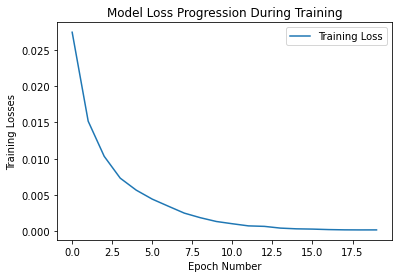

In [37]:
plt.plot(epochs_list.history['loss'])

plt.title('Model Loss Progression During Training')
plt.ylabel('Training Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss'])

In [38]:
from sklearn.metrics import r2_score

In [39]:
y_pred = model.predict(x_test)

In [40]:
r2_score(y_test, y_pred)

0.988990344532235